In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True



def build_time(duration_secs, sample_rate_sps):
    #Start, stop, num points
    return np.linspace(0, duration_secs, duration_secs*sample_rate_sps)
    #return np.arange(0, duration_secs, 1.0/sample_rate_sps)     



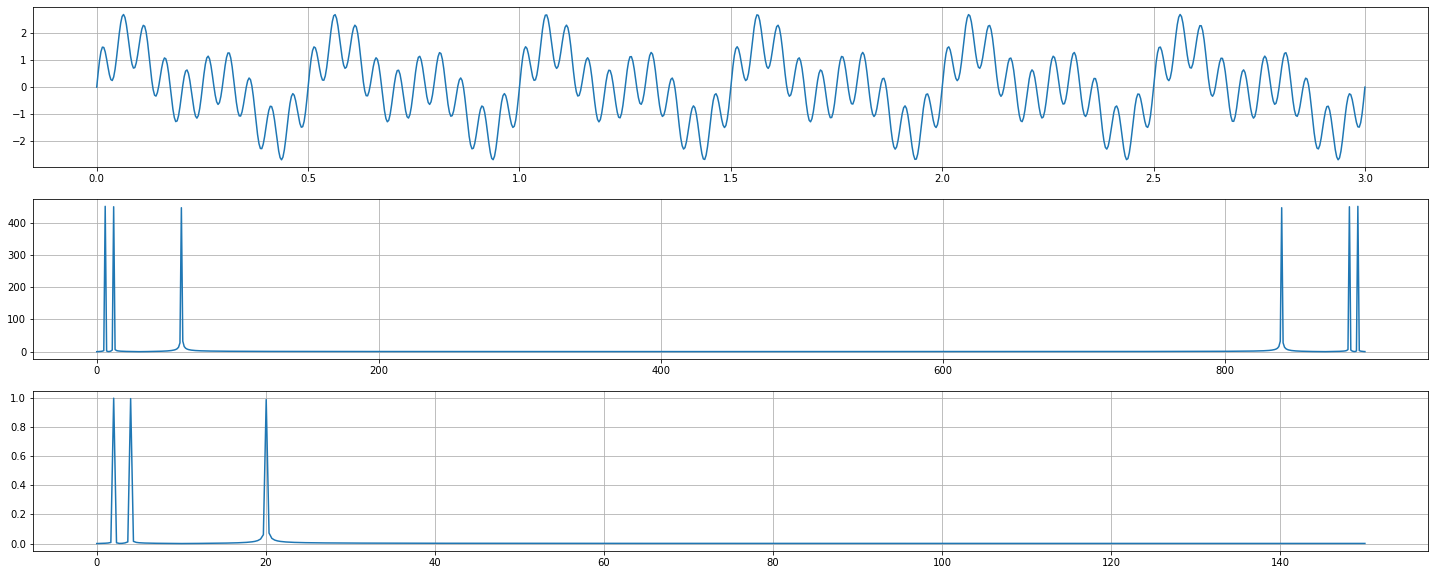

In [3]:
fig, (graph_1, graph_2, graph_3) = plt.subplots(3,1)


fig.set_figheight(10)
fig.set_figwidth(25)
    
def build_signal(time, frequency, amplitude, phase):
    return amplitude*np.sin(time*np.pi*2*frequency+phase)
    
duration_secs   = 3
sample_rate_sps = 300

time     = build_time(duration_secs, sample_rate_sps)
signal = build_signal(time, frequency=2, amplitude=1, phase=0)
signal += build_signal(time, frequency=4, amplitude=1, phase=0)
signal += build_signal(time, frequency=20, amplitude=1, phase=0)

fft = sp.fft.fft(signal)
fft = np.abs(fft)

# T = Sample Spacing
# N = Number of sample points
# T = 1/sample_rate_sps
N = duration_secs * sample_rate_sps

# Get rid of the mirroring. 
fft_x = np.linspace(0.0, sample_rate_sps/2, N//2)

# Looks like normalization
fft_y = 2.0/N * np.abs(fft[0:N//2])


# ifft = sp.fft.ifft(fft)

graph_1.plot(time, signal)
graph_2.plot(range(len(fft)), fft)
graph_3.plot(fft_x, fft_y)

plt.show()

You can't represent negative frequencies with real valued vectors!

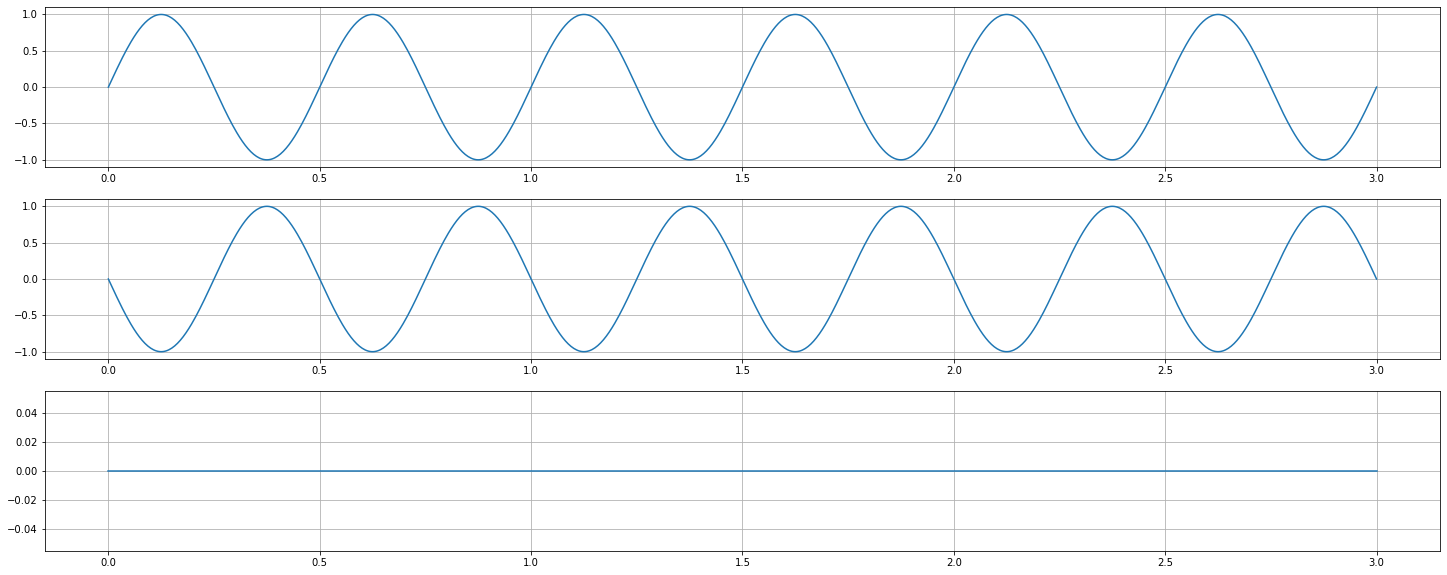

In [3]:
fig, (graph_1, graph_2, graph_3) = plt.subplots(3,1)


fig.set_figheight(10)
fig.set_figwidth(25)
    
duration_secs   = 3
sample_rate_sps = 300

time     = build_time(duration_secs, sample_rate_sps)
signal_1 = build_signal(time, frequency=2, amplitude=1, phase=0)
signal_2 = build_signal(time, frequency=-2, amplitude=1, phase=0)

graph_1.plot(time, signal_1)
graph_2.plot(time, signal_2)
graph_3.plot(time, signal_1+signal_2)

plt.show()


$$\rightarrow A(t) * \sin (\omega_c t + \phi(t)) = I(t)\sin(\omega_c t) + Q(t)\sin(\omega_c t+\frac{\pi}{2})$$

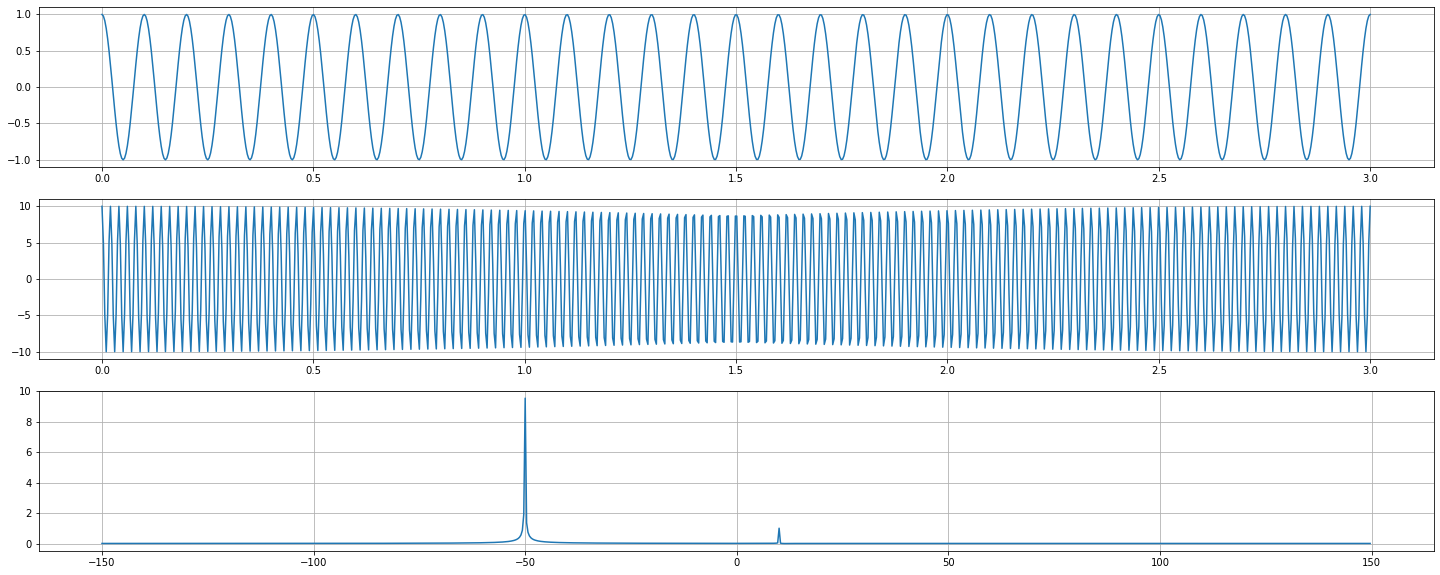

In [14]:
fig, (graph_1, graph_2, graph_3) = plt.subplots(3,1)


fig.set_figheight(10)
fig.set_figwidth(25)
    
def build_signal(time, frequency, amplitude, phase):
#     I = amplitude*np.cos(phase*time)
#     Q = amplitude*np.sin(phase*time)*1.0j
    
#     omega_c = 2*np.pi*frequency
#     I = I * np.sin(omega_c*time)
#     Q = Q * np.sin(omega_c*time + np.pi/2)
    
#     return I+Q
    return amplitude * np.exp(1.0j*(phase+2*np.pi*frequency*time))
#     return amplitude * np.exp(1.0j * 2*np.pi * time * frequency+phase)
    
duration_secs   = 3
sample_rate_sps = 300

time     = build_time(duration_secs, sample_rate_sps)
signal_1 = build_signal(time, frequency=10, amplitude=1, phase=np.pi*0)
signal_2 = build_signal(time, frequency=-50, amplitude=10, phase=0)

N = duration_secs * sample_rate_sps
T = 1/sample_rate_sps

yf = sp.fft.fft(signal_1 + signal_2)
xf = sp.fft.fftfreq(N, T)
xf = sp.fft.fftshift(xf)
yplot = sp.fft.fftshift(yf)


graph_1.plot(time, signal_1.real)
graph_2.plot(time, signal_2.real)
graph_3.plot(xf, 1.0/N * np.abs(yplot))

plt.show()



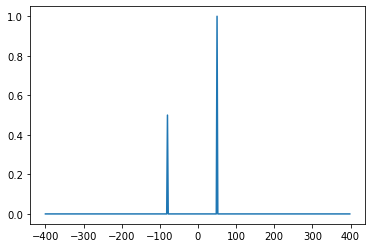

In [5]:
# Straight from https://docs.scipy.org/doc/scipy/tutorial/fft.html
from scipy.fft import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

# Deeper look at FFT

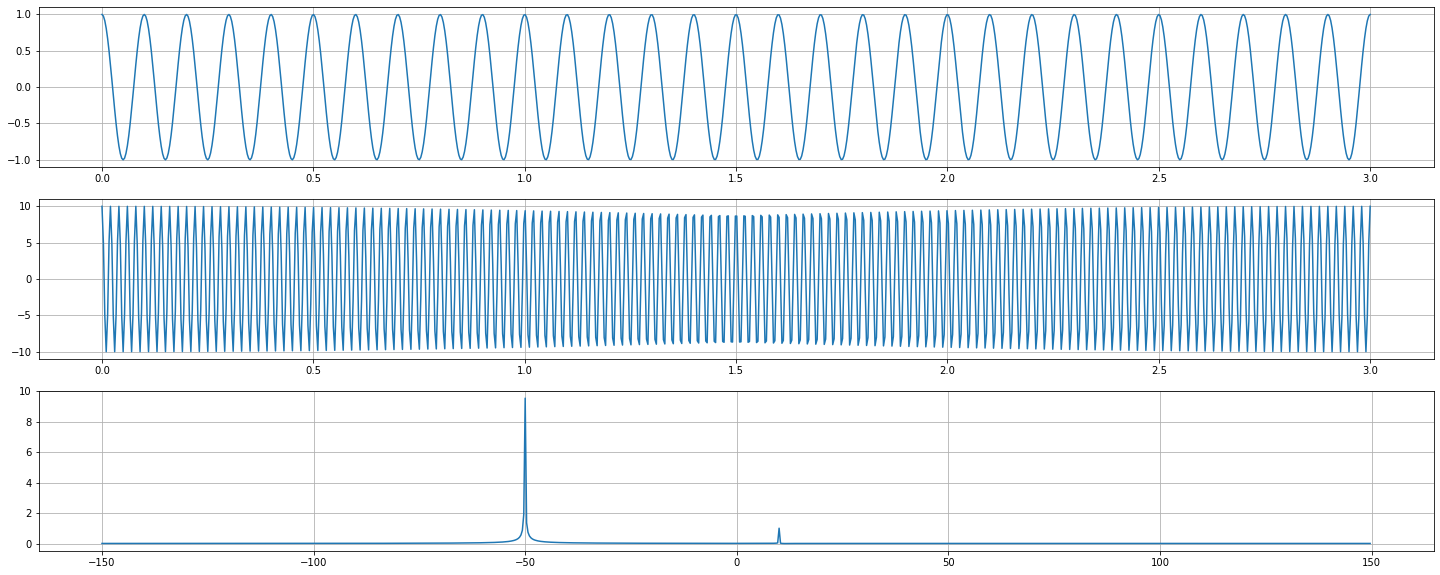

In [15]:
fig, (graph_1, graph_2, graph_3) = plt.subplots(3,1)


fig.set_figheight(10)
fig.set_figwidth(25)

duration_secs   = 3
sample_rate_sps = 300

time     = build_time(duration_secs, sample_rate_sps)
signal_1 = build_signal(time, frequency=10, amplitude=1, phase=np.pi*0)
signal_2 = build_signal(time, frequency=-50, amplitude=10, phase=0)

N = duration_secs * sample_rate_sps
T = 1/sample_rate_sps

yf = sp.fft.fft(signal_1 + signal_2)
xf = sp.fft.fftfreq(N, T)
xf = sp.fft.fftshift(xf)
yplot = sp.fft.fftshift(yf)


graph_1.plot(time, signal_1.real)
graph_2.plot(time, signal_2.real)
graph_3.plot(xf, 1.0/N * np.abs(yplot))

plt.show()